In [100]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [101]:
#df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date', index_col='Created_Date')
#df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date', index_col='Created_Date')
#df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date', index_col='Created_Date')
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [102]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [103]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
df_2016 = df_2016.set_index('Created_Date')

In [104]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [105]:
df_2014.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2014-01-01,1512,388,155,336,139,303,34,10,0
2014-01-02,3236,921,263,360,315,320,33,9,1
2014-01-03,3712,624,235,306,240,516,19,4,2
2014-01-04,4347,489,154,375,130,1188,31,10,3
2014-01-05,2529,500,169,361,206,1022,49,1,4


In [106]:
df_2016.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2016-01-01,0,0,0,0,0,0,42,0,0
2016-01-02,0,0,0,0,0,0,40,0,1
2016-01-03,0,0,0,0,0,0,45,0,2
2016-01-04,0,0,0,0,0,0,36,0,3
2016-01-05,0,0,0,0,0,0,29,0,4


In [107]:
df_2015.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather,day
Created_Date,,,,,,,,,
2015-01-01,1607,369,273,438,112,264,40,8,0
2015-01-02,1935,604,581,588,282,499,45,8,1
2015-01-03,1527,465,369,511,156,322,47,4,2
2015-01-04,1230,395,403,486,165,357,55,1,3
2015-01-05,2797,748,705,625,537,734,51,8,4


In [108]:
#df.ix[:,'b':]
train_years = pd.concat([df_2014, df_2015])
#X = (train_years.index - train_years.index[0]).days.reshape(-1,1)
#y = train_years['Max_TempF'].values
X = train_years[['Building_Conditions', 'General_Request', 'Living_Conditions', 'Parking_Enforcement', 'Signal_Sign_Repair', 'Street_Sidewalk_Repair', 'day']]
y = train_years['Max_TempF']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(train_years, train_years, test_size=0.5)

In [110]:
#X = train_years[:365]
#y = train_years[365:]
#X_new = df_2016.Max_TempF.values

In [111]:
lr = LinearRegression()
clf = LinearSVC()
svr = SVR()

In [112]:
svr = svr.fit(X, y)

In [113]:
clf = clf.fit(X,y)

In [114]:
lr = lr.fit(X,y)

In [115]:
print 'Regression Coefficients: \n', lr.coef_

Regression Coefficients: 
[-0.0115444   0.01557943  0.04571485 -0.02602712 -0.02382624  0.009924
  0.04715253]


In [116]:
lr.score(X,y)

0.79543462979218815

In [117]:
p = lr.predict(X)
err = abs(p-y)

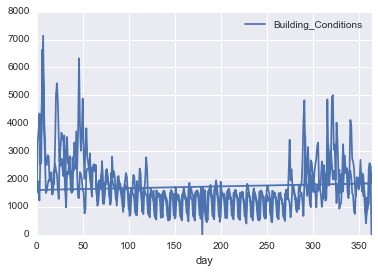

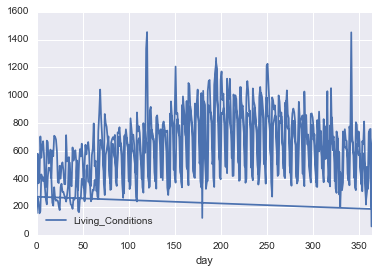

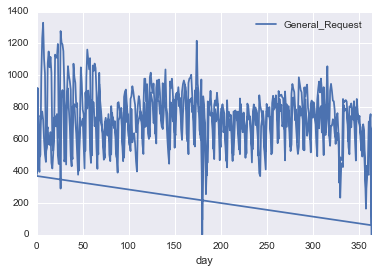

In [120]:
train_years.plot(kind='line',x='day',y='Building_Conditions')
train_years.plot(kind='line',x='day',y='Living_Conditions')
train_years.plot(kind='line',x='day',y='General_Request')

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#train_years.plot(kind='scatter', x=X, y='Max_TempF', ax=axs[0], figsize=(16, 8))
#train_years.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
#train_years.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2014.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2014.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2014.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Parking_Enforcement', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [ ]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])